In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_desktop = pd.read_json('./academy_monthly_desktop_201507-202309.json',convert_dates=False)
df_mobile = pd.read_json('./academy_monthly_mobile_201507-202309.json',convert_dates=False)
df_all = pd.read_json('./academy_monthly_cumulative_201507-202309.json',convert_dates=False)

df_desktop['timestamp'] = pd.to_datetime(df_desktop['timestamp'],format='%Y%m%d%H')
df_mobile['timestamp'] = pd.to_datetime(df_mobile['timestamp'],format='%Y%m%d%H')

## Maximum Average and Minimum Average

The code conducts an analysis on article views, computing mean views for selected articles on desktop and mobile platforms. It identifies articles with the maximum and minimum average views for each platform, focusing on specific movie titles. Finally, it generates a plot displaying the logarithmically-scaled views for these movies across both desktop and mobile access.

In [3]:
desktop_views_mean = df_desktop.groupby('article')['views'].mean()

max_avg_views_article = desktop_views_mean.idxmax()
max_avg_views = desktop_views_mean.max()

min_avg_views_article = desktop_views_mean.idxmin()
min_avg_views = desktop_views_mean.min()

print(f"Article with the maximum average views: {max_avg_views_article}")
print(f"Maximum average views: {max_avg_views}")

print(f"Article with the minimum average views: {min_avg_views_article}")
print(f"Minimum average views: {min_avg_views}")

desktop_filtered = df_desktop[df_desktop['article'].isin(["Joker_(2019_film)", "Project_Hope_(film)"])]
desktop_filtered['timestamp'] = pd.to_datetime(desktop_filtered['timestamp'], format='%Y%m%d%H')

desk_max = desktop_filtered[desktop_filtered['article'] == "Joker_(2019_film)"]
desk_min = desktop_filtered[desktop_filtered['article'] == "Project_Hope_(film)"]

x_desk_max = desk_max['timestamp']
y_desk_max = desk_max['views']
x_desk_min = desk_min['timestamp']
y_desk_min = desk_min['views']

Article with the maximum average views: Joker_(2019_film)
Maximum average views: 216853.25396825396
Article with the minimum average views: Project_Hope_(film)
Minimum average views: 36.61616161616162


/var/folders/1c/c2gm4rw56831d9cfkdf10y7h0000gn/T/ipykernel_2278/4060799195.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desktop_filtered['timestamp'] = pd.to_datetime(desktop_filtered['timestamp'], format='%Y%m%d%H')


In [4]:
mobile_views_mean = df_mobile.groupby('article')['views'].mean()

max_avg_views_article = mobile_views_mean.idxmax()
max_avg_views = mobile_views_mean.max()

min_avg_views_article = mobile_views_mean.idxmin()
min_avg_views = mobile_views_mean.min()

print(f"Article with the maximum average views: {max_avg_views_article}")
print(f"Maximum average views: {max_avg_views}")

print(f"Article with the minimum average views: {min_avg_views_article}")
print(f"Minimum average views: {min_avg_views}")

mobile_filtered = df_mobile[df_mobile['article'].isin(["Joker_(2019_film)", "Project_Hope_(film)"])]
mobile_filtered['timestamp'] = pd.to_datetime(mobile_filtered['timestamp'], format='%Y%m%d%H')

mob_max = mobile_filtered[mobile_filtered['article'] == "Joker_(2019_film)"]
mob_min = mobile_filtered[mobile_filtered['article'] == "Project_Hope_(film)"]

x_mob_max = mob_max['timestamp']
y_mob_max = mob_max['views']
x_mob_min = mob_min['timestamp']
y_mob_min = mob_min['views']

Article with the maximum average views: The_Whale_(2022_film)
Maximum average views: 525412.8666666667
Article with the minimum average views: Project_Hope_(film)
Minimum average views: 9.11111111111111


/var/folders/1c/c2gm4rw56831d9cfkdf10y7h0000gn/T/ipykernel_2278/450891302.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_filtered['timestamp'] = pd.to_datetime(mobile_filtered['timestamp'], format='%Y%m%d%H')


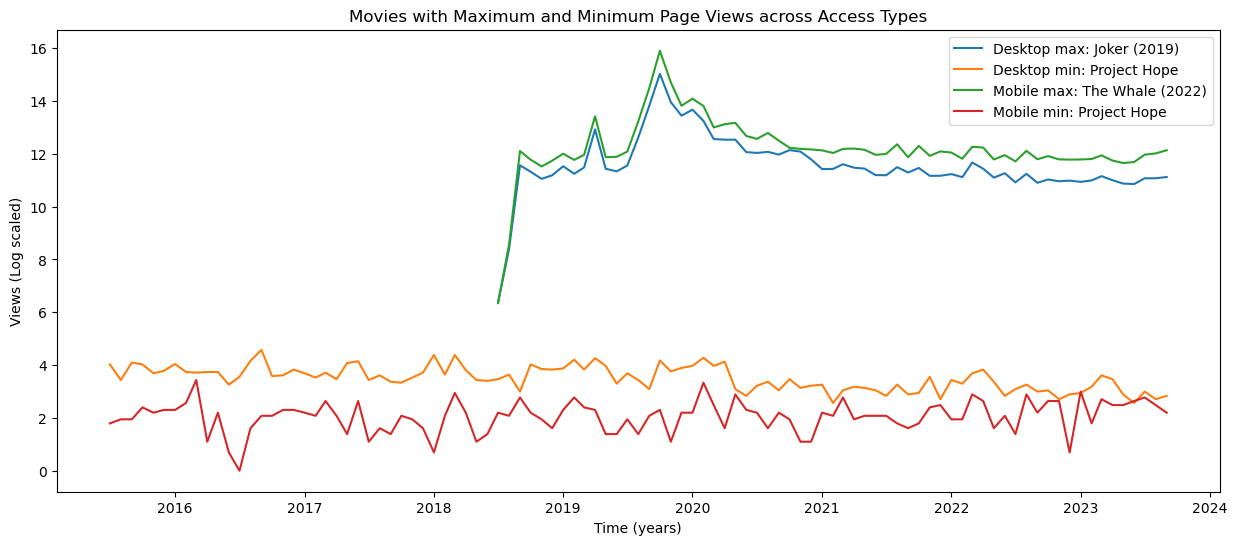

In [5]:
plt.figure(figsize=(15,6))
plt.plot(x_desk_max,np.log(y_desk_max),label="Desktop max: Joker (2019)")
plt.plot(x_desk_min,np.log(y_desk_min),label="Desktop min: Project Hope")
plt.plot(x_mob_max,np.log(y_mob_max),label="Mobile max: The Whale (2022)")
plt.plot(x_mob_min,np.log(y_mob_min),label="Mobile min: Project Hope")
plt.xlabel("Time (years)")
plt.ylabel("Views (Log scaled)")
plt.title("Movies with Maximum and Minimum Page Views across Access Types")
plt.legend()
plt.show()

## Top 10 Peak Page Views

The code begins by identifying the top 10 movies with the highest views on desktop and mobile platforms, carefully organizing the timestamps and view counts for these movies into structured data. This preparation sets the stage for a visual representation, showcasing how these movies perform in terms of views over time. The resulting plot employs solid lines for desktop views and dashed lines for mobile views, allowing for a clear comparison of their respective audience engagement patterns.

In [6]:

top_10_movies_max_views = df_desktop.groupby('article')['views'].max().nlargest(10)
top_10_movie_titles = top_10_movies_max_views.index.tolist()

timestamps_list = []
views_list = []

for title in top_10_movie_titles:
    timestamps_list.append(df_desktop[df_desktop['article'] == title]['timestamp'])
    views_list.append(df_desktop[df_desktop['article'] == title]['views'])

timestamps_df = pd.concat(timestamps_list, axis=1)
views_df = pd.concat(views_list, axis=1)

timestamps_df.columns = top_10_movie_titles
views_df.columns = top_10_movie_titles

top_10_movie_titles

['Joker_(2019_film)',
 'Parasite_(2019_film)',
 'Black_Panther_(film)',
 'The_Revenant_(2015_film)',
 'Avatar:_The_Way_of_Water',
 'Spectre_(2015_film)',
 'Dune_(2021_film)',
 '1917_(2019_film)',
 'Tenet_(film)',
 'Blade_Runner_2049']

In [7]:

top_10_movies_max_views_mobile = df_mobile.groupby('article')['views'].max().nlargest(10)
top_10_movie_titles_mobile = top_10_movies_max_views_mobile.index.tolist()

timestamps_list_mobile = []
views_list_mobile = []

for title in top_10_movie_titles_mobile:
    timestamps_list_mobile.append(df_mobile[df_mobile['article'] == title]['timestamp'])
    views_list_mobile.append(df_mobile[df_mobile['article'] == title]['views'])

timestamps_df_mobile = pd.concat(timestamps_list_mobile, axis=1)
views_df_mobile = pd.concat(views_list_mobile, axis=1)

timestamps_df_mobile.columns = top_10_movie_titles_mobile
views_df_mobile.columns = top_10_movie_titles_mobile

top_10_movie_titles_mobile

['Avatar:_The_Way_of_Water',
 'Joker_(2019_film)',
 'Black_Panther_(film)',
 'Parasite_(2019_film)',
 'Black_Panther:_Wakanda_Forever',
 'RRR_(film)',
 'Dune_(2021_film)',
 'The_Revenant_(2015_film)',
 'Top_Gun:_Maverick',
 'Everything_Everywhere_All_at_Once']

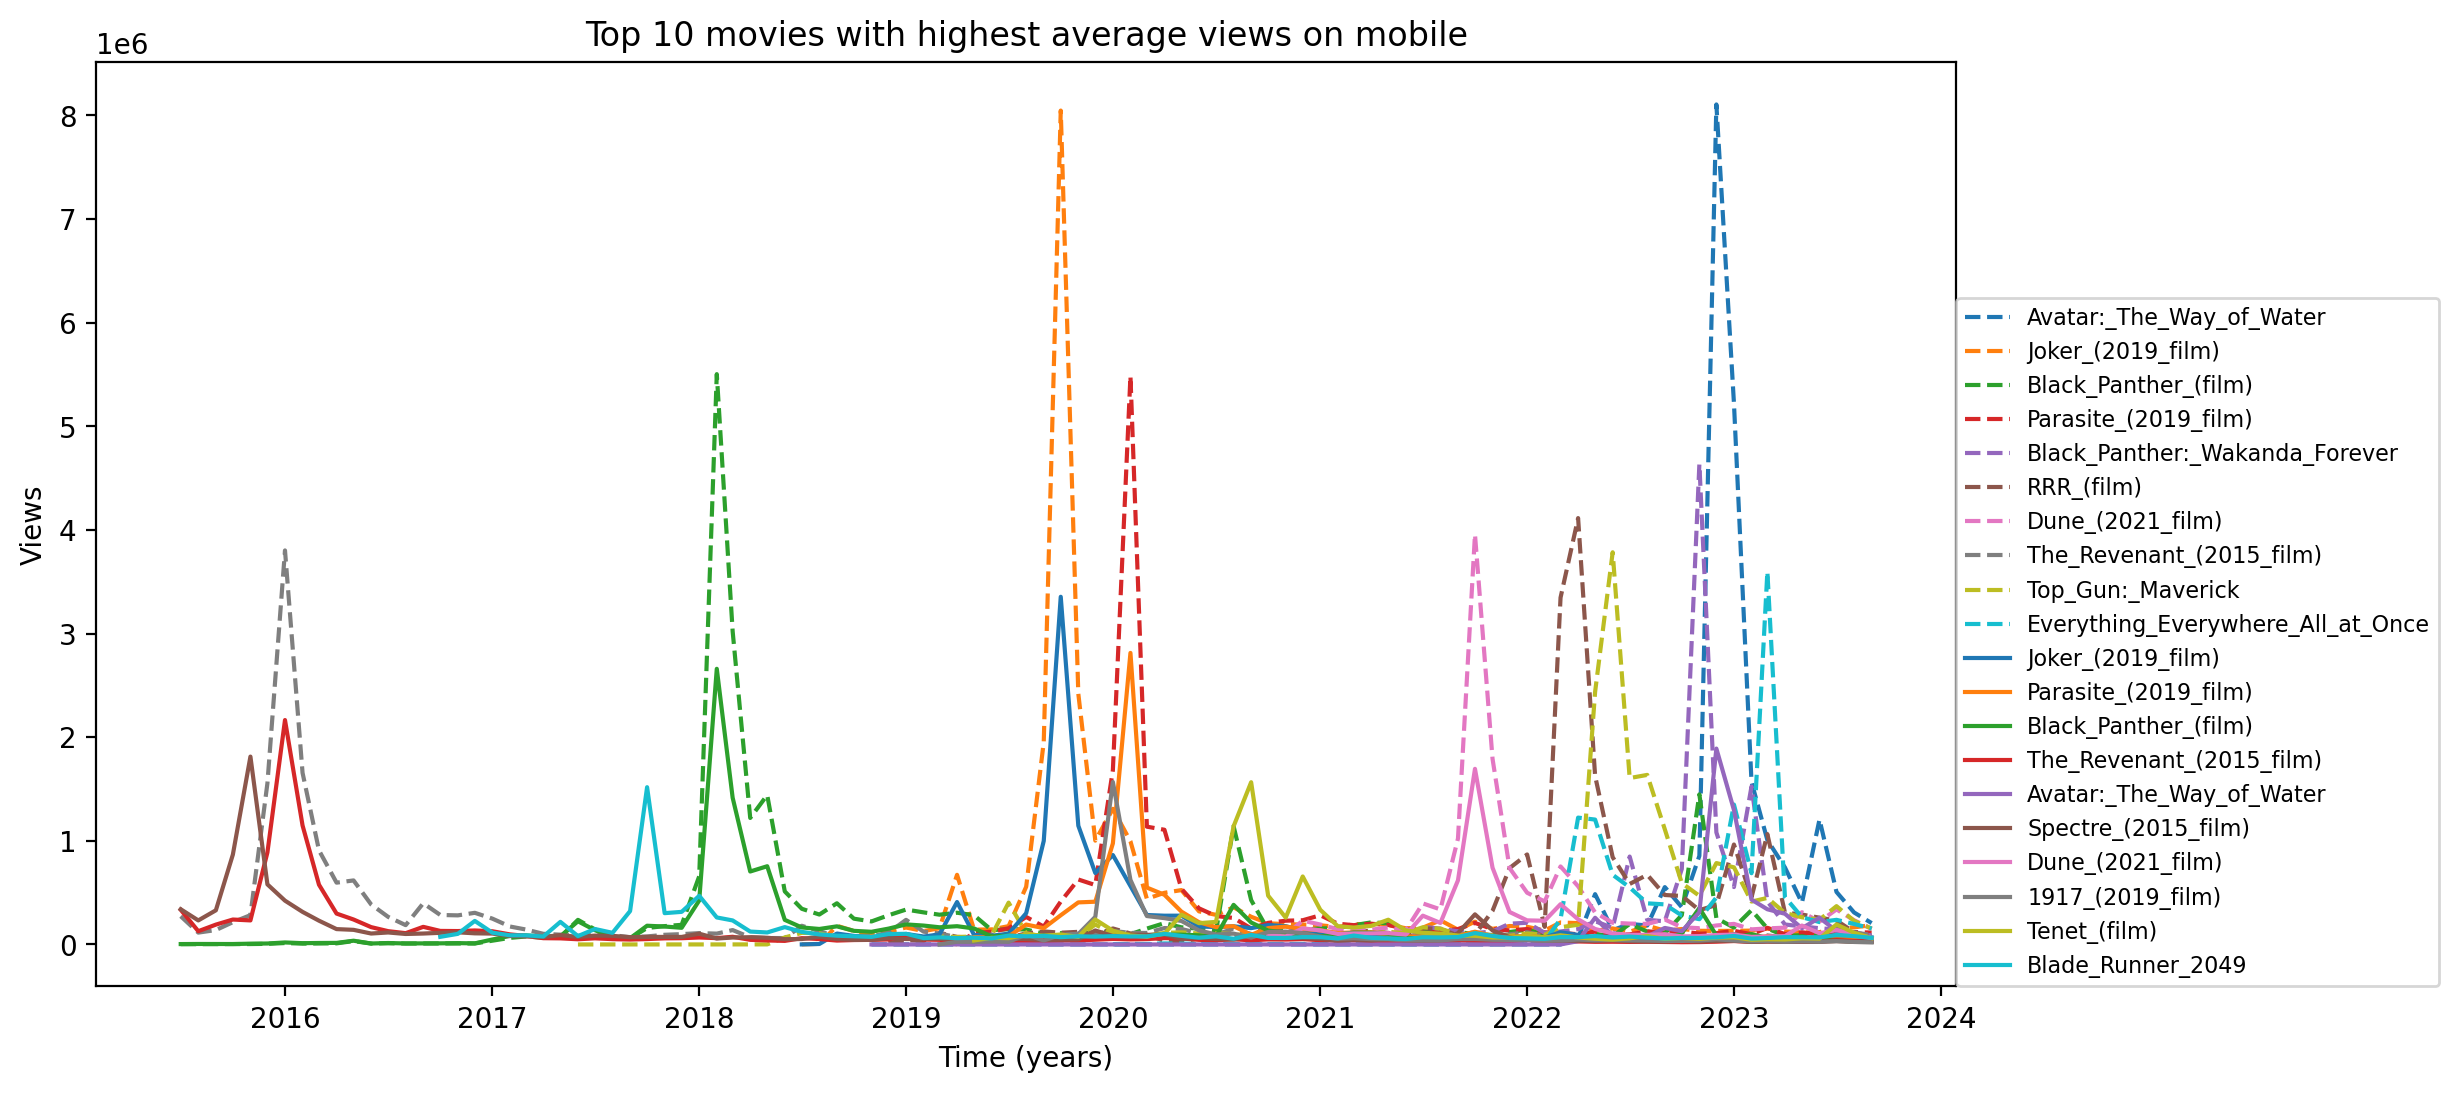

In [8]:
plt.figure(figsize=(12, 6), dpi=200)

for title in top_10_movie_titles_mobile:
    plt.plot(timestamps_df_mobile[title], views_df_mobile[title], label=f"{title}", linestyle='dashed')

for title in top_10_movie_titles:
    plt.plot(timestamps_df[title], views_df[title], label=f"{title}")


plt.xlabel("Time (years)")
plt.ylabel("Views")

plt.title("Top 10 movies with highest average views on mobile")
# yticks = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
# yticklabels = [str(i) for i in yticks]
# plt.yticks(yticks, yticklabels)
plt.legend(prop={'size': 8}, loc=(1, 0))
plt.show()


## Fewest Months of Data

In this code, we first identify the top 10 movies with the least amount of data by counting the occurrences of each movie title in both the desktop and mobile datasets. We then retrieve these movie titles and proceed to plot their respective view counts over time (in months) for both desktop and mobile access types. The resulting plot helps visualize and compare the views of these top 10 movies across access platforms.

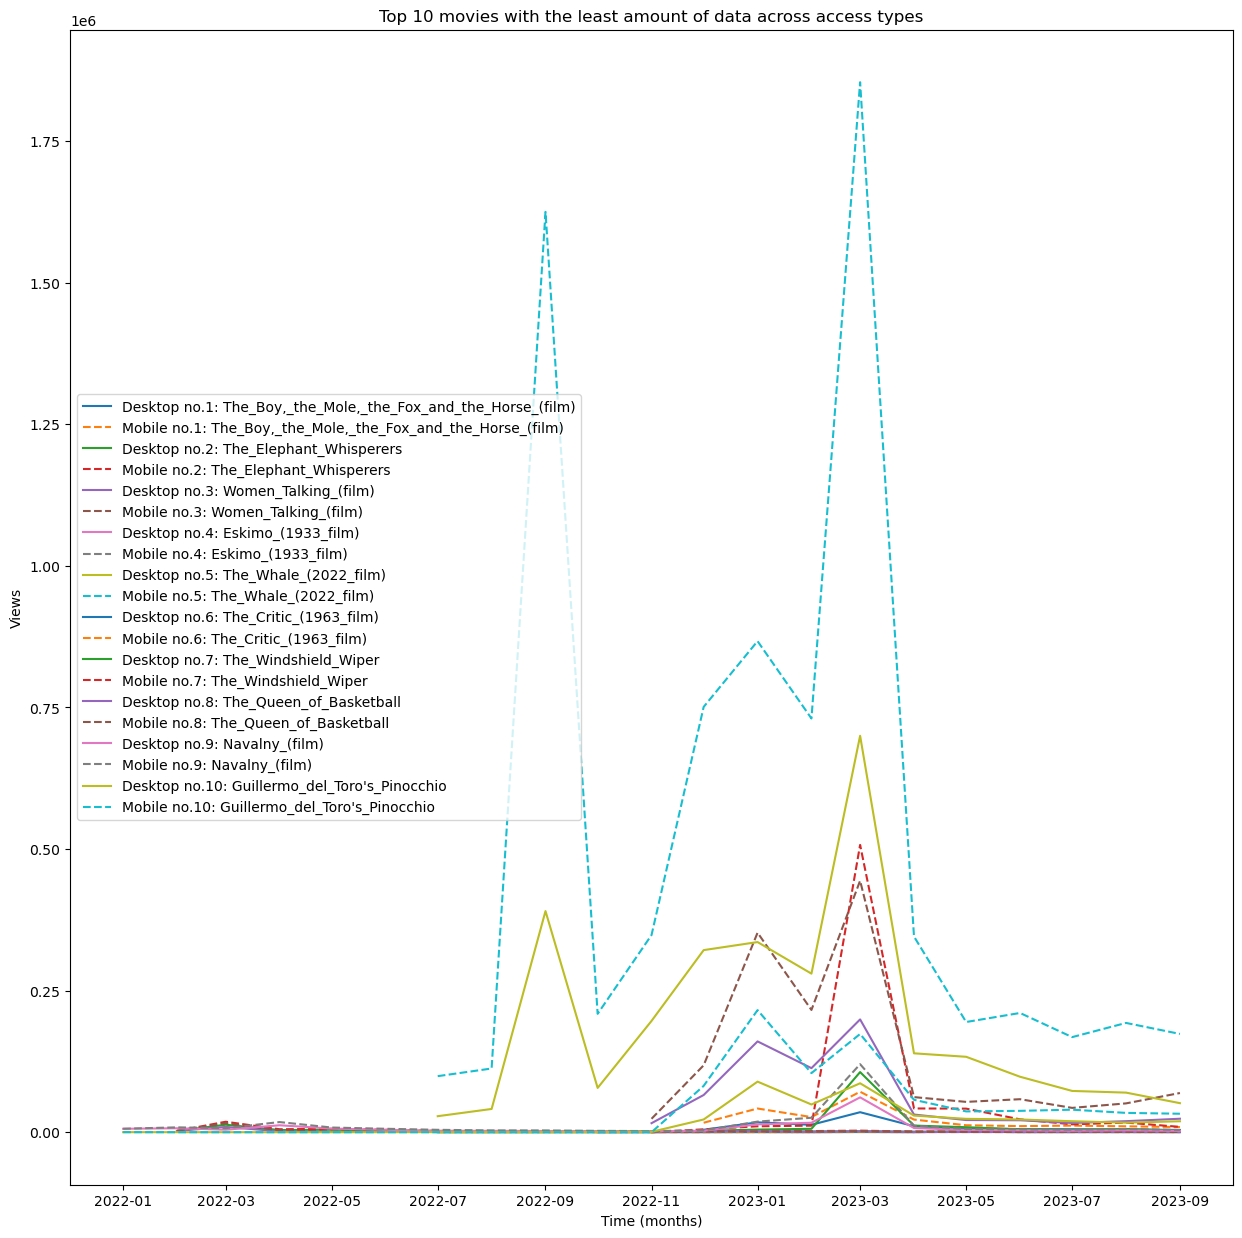

In [9]:
desk_mindata = df_desktop.groupby(by='article').count().sort_values(by='views').head(10)

mob_mindata = df_mobile.groupby(by='article').count().sort_values(by='views').head(10)

desktop_top10 = desk_mindata.index.to_list()
mobile_top10 = mob_mindata.index.to_list()

plt.figure(figsize=(15,15))

for i in range(10):
    desktop_movie = df_desktop[df_desktop['article'] == desktop_top10[i]]
    mobile_movie = df_mobile[df_mobile['article'] == mobile_top10[i]]

    plt.plot(desktop_movie['timestamp'], desktop_movie['views'], label=f"Desktop no.{i+1}: {desktop_top10[i]}")
    plt.plot(mobile_movie['timestamp'], mobile_movie['views'], label=f"Mobile no.{i+1}: {mobile_top10[i]}", linestyle="dashed")

plt.xlabel("Time (months)")
plt.ylabel("Views")
plt.title("Top 10 movies with the least amount of data across access types")
plt.legend()
plt.show()